In [1]:
# import torch

import sys
import time
import os
from collections import Counter
from tqdm import tqdm
import pandas as pd

from transformers import BertTokenizer, BertModel, BertForMaskedLM
# import torch.nn.functional as F

## simple 3-word SVO(adj) with verb fixed

In [6]:
import numpy as np
import itertools
import utils
import csv
from collections import Counter
choice = np.random.choice
import matplotlib.pyplot as plt

In [8]:

male_names = []
female_names = []
for row in csv.DictReader(open("raw_data/most_common_female_names.csv")):
    female_names.append(row['name'])
for row in csv.DictReader(open("raw_data/most_common_male_names.csv")):
    male_names.append(row['name'])
subject_pool = ["his name is","her name is", "my name is", "your name is"]
his_name, her_name, my_name, your_name = subject_pool[0],subject_pool[1],subject_pool[2],subject_pool[3]
exclude = ['Ewan', 'Alastair', 'Euan', 'Calum', 'Alasdair', 'Greig', 'Martyn', 'Kieran', 'Kristopher', 'Keiran', 'Ciaran', 'Finlay', 'Arran', 'Keir', 'Kian', 'Lennon', 'Kenzie', 'Alfie', 'Jayden', 'Zak', 'Kayden', 'Kaiden', 'Ruaridh', 'Olly', 'Callan', 'Jaxon', 'Lachlan', 'Arlo', 'Innes', 'Ruairidh', 'Struan', 'Lorna', 'Kirsty', 'Shona', 'Catriona', 'Morag', 'Kirsten', 'Kirsteen', 'Lynsey', 'Aileen', 'Arlene', 'Mhairi', 'Gayle', 'Leanne', 'Lyndsey', 'Lyndsay', 'Charlene', 'Linsey', 'Eilidh', 'Hayley', 'Alana', 'Siobhan', 'Rachael', 'Ashleigh', 'Kayleigh', 'Jemma', 'Linzi', 'Jodie', 'Michaela', 'Sinead', 'Kerri', 'Kirstie', 'Nicolle', 'Rebekah', 'Hollie', 'Chantelle', 'Abbie', 'Niamh', 'Rhiannon', 'Caitlyn', 'Kaitlin', 'Ciara', 'Meghan', 'Lauryn', 'Ailsa', 'Morven', 'Cerys', 'Kiera', 'Freya', 'Zara', 'Orla', 'Keira', 'Neve', 'Abi', 'Abbi', 'Alisha', 'Mya', 'Maisie', 'Imogen', 'Nieve', 'Miley', 'Mollie', 'Laila', 'Mirren', 'Ayla', 'Mila', 'Esme', 'Arianna', 'Thea', 'Ariana', 'Lillie', 'Hallie', 'Aila', 'Myla', 'Aoife', 'Lottie', 'Lyla', 'Remi', 'Maeve', 'Ayda', 'Arabella']
exclude.extend(['Iain', 'Graeme', 'Alistair', 'Roderick', 'Gregor', 'Callum', 'Niall', 'Barrie', 'Antony', 'Declan', 'Aidan', 'Rhys', 'Reece', 'Hamish', 'Conner', 'Ronan', 'Aiden', 'Mackenzie', 'Brodie', 'Luca', 'Ollie', 'Reuben', 'Brody', 'Zachary', 'Jax', 'Lyle', 'Finley', 'Myles', 'Gillian', 'Jacqueline', 'Lesley', 'Pauline', 'Lorraine', 'Tracey', 'Lynne', 'Yvonne', 'Joanne', 'Gail', 'Joanna', 'Maureen', 'Mandy', 'Jillian', 'Vicky', 'Stacey', 'Gemma', 'Kimberley', 'Adele', 'Kylie', 'Robyn', 'Caitlin', 'Aimee', 'Cara', 'Demi', 'Bethany', 'Toni', 'Abigail', 'Iona', 'Isla', 'Kelsey', 'Carla', 'Kaitlyn', 'Jasmine', 'Skye', 'Rosie', 'Kayla', 'Elle', 'Ella', 'Millie', 'Ava', 'Evie', 'Alyssa', 'Poppy', 'Isabella', 'Charley', 'Layla', 'Libby', 'Lexi', 'Amelie', 'Phoebe', 'Lexie', 'Lucie', 'Sienna', 'Gracie', 'Rowan', 'Sofia', 'Lacey', 'Emilia', 'Lola', 'Darcy', 'Aria', 'Matilda', 'Elsie', 'Georgie', 'Sadie', 'Arya', 'Callie', 'Penelope', 'Cora', 'Evelyn', 'Alba'])
for word in exclude:
    try:  male_names.remove(word)
    except ValueError as e: pass
    try:  female_names.remove(word)
    except ValueError as e: pass

all_names = male_names + female_names
n = len(male_names)

In [14]:

sentences = []
answers = []

for n1, n2 in zip(all_names, np.array(all_names)[choice(np.arange(len(all_names)), len(all_names))]):
    sentence = []
    context = [my_name, n1]
    sentence.extend(context)

    sent = ["and", your_name, n2, "."]
    sentence.extend(sent)
    
    question = ["So", my_name, "[MASK]", "."]
    sentence.extend(question)

    sentence = " ".join(sentence)
    sentences.append(sentence)
    answers.append(n1)


In [15]:

utils.to_csv(sentences, answers,"cloze/simple_SVO/names/my_name/num_attractors=1.csv")

In [4]:
f = open("baby-names.csv")
reader = csv.DictReader(f)
male_names = []
female_names = []
for row in reader:
    if row['sex'] == "B": male_names.append(row['name'])
    else: female_names.append(row['name'])

In [21]:
f = open("babies-first-names-top-100-girls.csv")
reader = csv.DictReader(f)
female_names = Counter()
for row in reader:
    c = {row['FirstForename']:int(row['number'])}
    female_names.update(c)

In [22]:
with open("most_common_female_names.csv", 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["name","rank"])
    for i, name in enumerate(female_names.keys()):
        writer.writerow([name, i])

In [2]:
f = open("raw_data/simple_SVO/names/results.csv")
reader = csv.DictReader(f)
results = {}
for row in reader:
    model = row['model']
    results[model] = [float(row['0'].strip()), float(row['1'].strip()),float(row['2'].strip()),float(row['3'].strip())]

In [1]:
legend = ["BertBase", "BertLarge", "RobertaBase","RobertaLarge","GPT2Small","GPT2Medium"]
color_list = ['k','y','m','g','c','r','b','lime']
marker_list = ['o','s','^','x','d','p','*','8']
linestyle_list = ['solid','dashed','dashdot','dotted','solid','dashed','dashdot','dotted']

In [5]:
try:
    legend.remove("1")
except ValueError as e:
    print(1) 

SyntaxError: unexpected EOF while parsing (936239656.py, line 2)

In [16]:

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0.5, 1.0, 'cloze task: names')

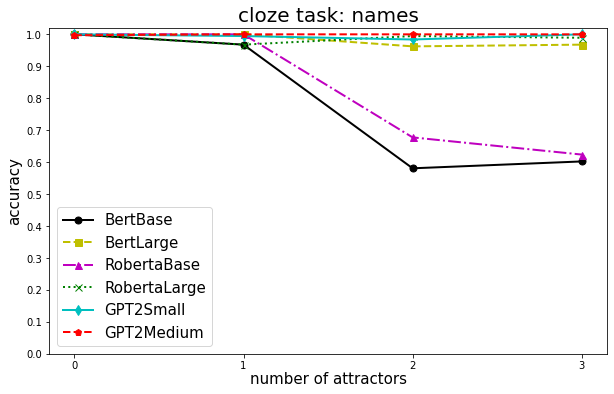

In [18]:
plt.figure(figsize=(10,6))
for i, val in enumerate(results.values()):
    plt.plot(val,linewidth=2.0, color=color_list[i],
		markersize=7,linestyle=linestyle_list[i],label=model,marker=marker_list[i])
plt.xticks([0,1,2,3])
plt.yticks(np.arange(0,1.1,0.1))
plt.legend(legend)
plt.xlabel('number of attractors', labelpad=1)
plt.ylabel('accuracy')
plt.title("cloze task: names")

In [107]:
def name_1(male_names, female_names, subject_pool):
    sentences = []
    answers = []

    for n1, n2 in zip(male_names, female_names):
        sentence = []
        context = [subject_pool[0], n1]
        sentence.extend(context)

        sent = ["and", subject_pool[1], n2, "."]
        sentence.extend(sent)
        
        question = ["So", subject_pool[0], "[MASK]", "."]
        sentence.extend(question)

        sentence = " ".join(sentence)
        sentences.append(sentence)
        answers.append(n1)
    return sentences, answers

In [108]:
def name_2(male_names, female_names, subject_pool):
    verb = "is"
    all_names = male_names + female_names
    my_names = choice(all_names, len(male_names))
    your_names = choice(all_names, len(male_names))
    sentences = []
    answers = []

    for n1, n2, n3 in zip(male_names, female_names, my_names):
        sentence = []
        context = [subject_pool[0], n1]
        sentence.extend(context)

        sent = [",", subject_pool[1], n2]
        sentence.extend(sent)

        sent = ["and", subject_pool[2], n3, "."]
        sentence.extend(sent)

        question = ["So", subject_pool[0], "[MASK]", "."]
        sentence.extend(question)

        sentences.append(" ".join(sentence))
        answers.append(n1)
    return sentences, answers

In [109]:
def name_3(male_names, female_names, subject_pool):
    verb = "is"
    all_names = male_names + female_names
    my_names = choice(all_names, len(male_names))
    your_names = choice(all_names, len(male_names))
    sentences = []
    answers = []

    for n1, n2, n3, n4 in zip(male_names, female_names, my_names, your_names):
        sentence = []
        context = [subject_pool[0], n1]
        sentence.extend(context)

        sent = [",", subject_pool[1], n2]
        sentence.extend(sent)

        sent = [",", subject_pool[2], n3]
        sentence.extend(sent)

        sent = ["and", subject_pool[3], n4, "."]
        sentence.extend(sent)

        question = ["So", subject_pool[0], "[MASK]", "."]
        sentence.extend(question)
        
        sentences.append(" ".join(sentence))
        answers.append(n1)
    return sentences, answers

In [119]:
s,a = name_0(male_names, female_names, ["his name is","her name is"])
idx = choice(np.arange(len(s)),10000)
s = np.array(s)[idx]
a = np.array(a)[idx]
utils.to_csv(s,a,"raw_data/simple_SVO/names/num_attractors=0.csv")

In [120]:
s,a = name_1(male_names, female_names, ["his name is","her name is"])
idx = choice(np.arange(len(s)),10000)
s = np.array(s)[idx]
a = np.array(a)[idx]
utils.to_csv(s,a,"raw_data/simple_SVO/names/num_attractors=1.csv")

In [121]:
s,a = name_2(male_names, female_names, ["his name is","her name is", "my name is", "your name is"])
idx = choice(np.arange(len(s)),10000)
s = np.array(s)[idx]
a = np.array(a)[idx]
utils.to_csv(s,a,"raw_data/simple_SVO/names/num_attractors=2.csv")

In [122]:
s,a = name_3(male_names, female_names, ["his name is","her name is", "my name is", "your name is"])
idx = choice(np.arange(len(s)),10000)
s = np.array(s)[idx]
a = np.array(a)[idx]
utils.to_csv(s,a,"raw_data/simple_SVO/names/num_attractors=3.csv")

In [17]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = GPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

In [55]:
a = tokenizer.decode(output[:,-1], skip_special_tokens=True)

In [57]:
a.lower()

' james st a the t william george william paul james'

In [105]:
# encode context the generation is conditioned on
input_ids = torch.tensor([tokenizer.encode('his name is John and her name is Mary . So his name is')])
# generate text until the output length (which includes the context length) reaches 50
# greedy_output = model.generate(torch.tensor([input_ids]), max_length=len(input_ids)+1)
output = model.generate(
    input_ids,
    do_sample=True, 
    max_length=len(input_ids[0])+1, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=5
)
print("Output:\n" + 100 * '-')
for o in output:
    print(tokenizer.decode(o, skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
his name is John and her name is Mary. So his name is John
his name is John and her name is Mary. So his name is John
his name is John and her name is Mary. So his name is Mary
his name is John and her name is Mary. So his name is "
his name is John and her name is Mary. So his name is Jesus


In [114]:
import pandas as pd

In [115]:
a = dict.fromkeys([1,2])

In [116]:
a

{1: None, 2: None}